# Código para a realización da memoria de cósmicos dixital.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from modulos_cosmicos import *
import math
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
from uncertainties import ufloat
import pandas as pd


plt.rcParams.update(plt.rcParamsDefault)
#plt.rcParams["figure.figsize"] = [8.0, 5.50]
plt.rcParams["figure.autolayout"] = True
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 11
plt.rcParams['font.family'] = "serif"

Gardamos todos os nomes dos archivos .txt para que sexa máis fácil o seu acceso posteriormente.

In [2]:
files1=['medidas/medidas1000V_410.txt','medidas/medidas1000V_1000.txt','medidas/medidas1000V_581.txt','medidas/coincidenciasaccidentais.txt','medidas/medida_alex_abcnod.txt']
files2=['medidas/v/800V_sentrapo.txt','medidas/v/800V_contrapo.txt','medidas/v/825V.txt','medidas/v/850V.txt','medidas/v/875V.txt','medidas/v/900V.txt','medidas/v/925V.txt','medidas/v/950V.txt'] #todas as medidas con trigger en AD e variando a voltaxe de B e C
files3=['medidas/xeo/distancia1_300.txt','medidas/xeo/distancia1_400.txt','medidas/xeo/distancia2_133.txt'] #datos para obter a eficiencia xeometrica
files4=['medidas/intr/triggerAD_600.txt','medidas/intr/triggerBC_1200_malalineado.txt','medidas/intr/triggerBC_benalineado.txt','medidas/intr/triggerBD_1200_ABcambiados.txt']
files5=['medidas/noites/noite1.txt','medidas/noites/noite2.txt','medidas/noites/noite3.txt']
files6=['medidas/nico/BC_900v.txt','medidas/nico/BC_850v.txt','medidas/nico/medidasABCD1000V_mercores_500contas.txt','medidas/nico/umbral200.txt','medidas/nico/umbral500.txt','medidas/nico/umbral1000.txt']
files7=['medidas/alex/A.txt','medidas/alex/ABC.txt','medidas/alex/ABCD.txt','medidas/alex/abcnod.txt','medidas/alex/medida_8_tau_3-5.txt']

### Representación trigger típico.

Representamos un dos triggeres típico que tivesen amplitude de -1V aprox.

Os triggers eliminados co novo umbral foron 543 de 581 triggers, 93.45955249569707 %


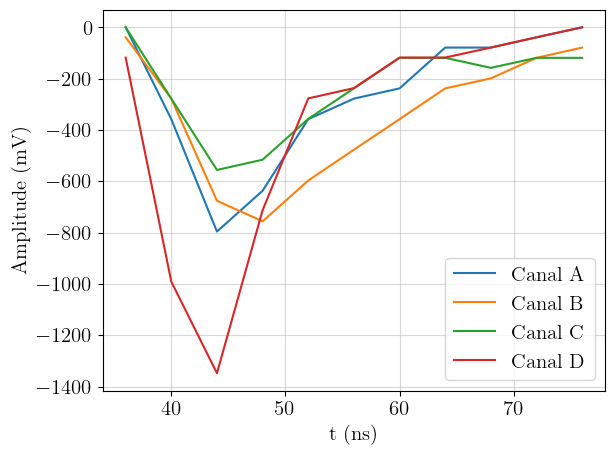

In [3]:
plt.rcParams['font.size'] = 15

m, t = read(files1[2])
m_nova=supresionCeros(m,t, -80)
m,t=novoUmbral(m_nova,t, -250,-250,-250,-250)

ns=m[5][0];cha=m[5][1];chb=m[5][2];chc=m[5][3];chd=m[5][4] #escollemos o sexto trigger, por exemplo
plt.plot()
plt.plot(ns[:-1],cha[:-1],label='Canal A')
plt.plot(ns[:-1],chb[:-1],label='Canal B')
plt.plot(ns[:-1],chc[:-1],label='Canal C')
plt.plot(ns[:-1],chd[:-1],label='Canal D')
plt.xlabel('t (ns)')
plt.ylabel('Amplitude (mV)')
plt.grid(alpha=0.5)
plt.legend(loc='lower right')
plt.savefig('repres_trigger.png', dpi=300)
plt.show()

## Representación mímimos da amplitude.

Representamos as graficas dos minimos das amplitudes para distintas condicions de trigger. Os mínimos obtivéronse obtendo a solución analítica parabólica que pasa polos tres puntos de amplitude mínima en cada disparo e cada canal.

Nesta primeira representación empregamos os datos tomados por nós no laboratorio. As medidas para 1000V foron tomadas cun trigger de -120 mV nos 4 detectores, empregamo a función *novoumbral* para que o trigger sexa o mesmo que nos demais casos (-200mV). Aínda que medimos 1000 contas despois de aplicar o novo umbral só temos 200, a área non vai ser a mesma en todos os casos por iso as frecuencias son tan baixas.

Número de triggers 1000
Os triggers eliminados co novo umbral foron 774 de 1000 triggers, 77.4 %
O número de mínimos é 226
Número de triggers 400
Os triggers eliminados co novo umbral foron 0 de 400 triggers, 0.0 %
O número de mínimos é 400
Número de triggers 400
Os triggers eliminados co novo umbral foron 1 de 400 triggers, 0.25 %
O número de mínimos é 399
Número de triggers 400
Os triggers eliminados co novo umbral foron 0 de 400 triggers, 0.0 %
O número de mínimos é 400


<Figure size 640x480 with 0 Axes>

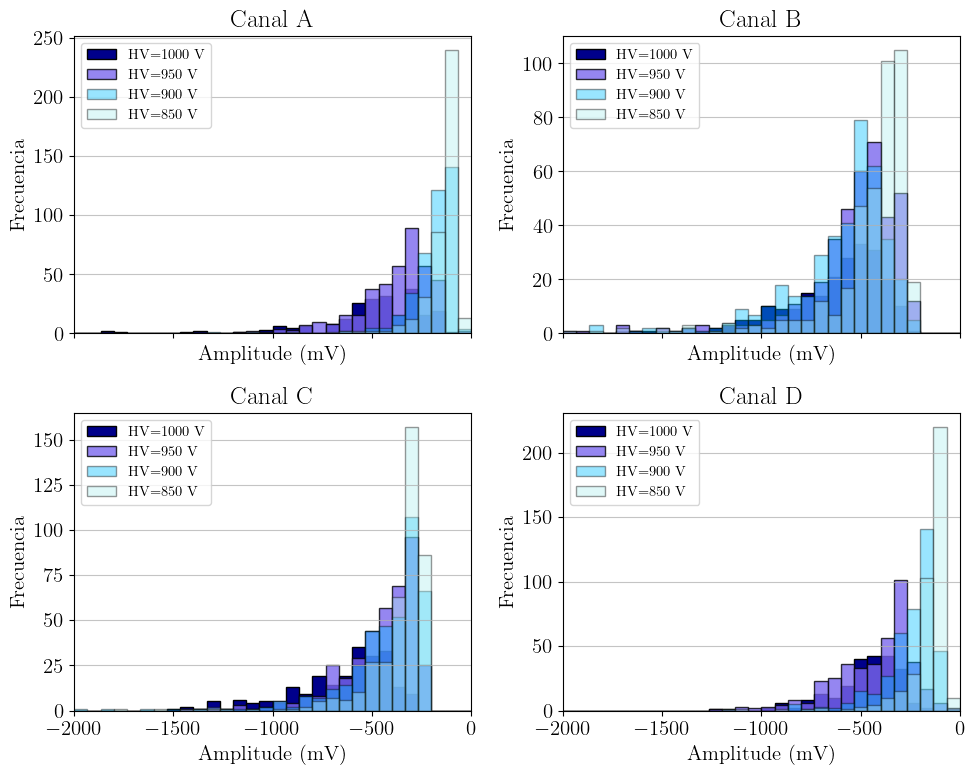

In [4]:
files_AD=['medidas/v/850V.txt','medidas/v/900V.txt','medidas/v/950V.txt','medidas/medidas1000V_1000.txt']
files_AD.reverse()
labels=['HV=850 V','HV=900 V','HV=950 V','HV=1000 V']
labels.reverse()
colors=['darkblue','mediumslateblue','deepskyblue','paleturquoise']
alphas=[1,0.8,0.4,0.4]
hist_amplitudes(files_AD,labels,colors,alphas)

Neste caso representamos os datos de Nico e Alberte. En teoría o disparo foi con trigger en B e C pero a variación da voltaxe debeu ser no detector A por como é a curva...

Número de triggers 500
Os triggers eliminados co novo umbral foron 0 de 500 triggers, 0.0 %
O número de mínimos é 500
Número de triggers 400
Os triggers eliminados co novo umbral foron 0 de 400 triggers, 0.0 %
O número de mínimos é 400


<Figure size 640x480 with 0 Axes>

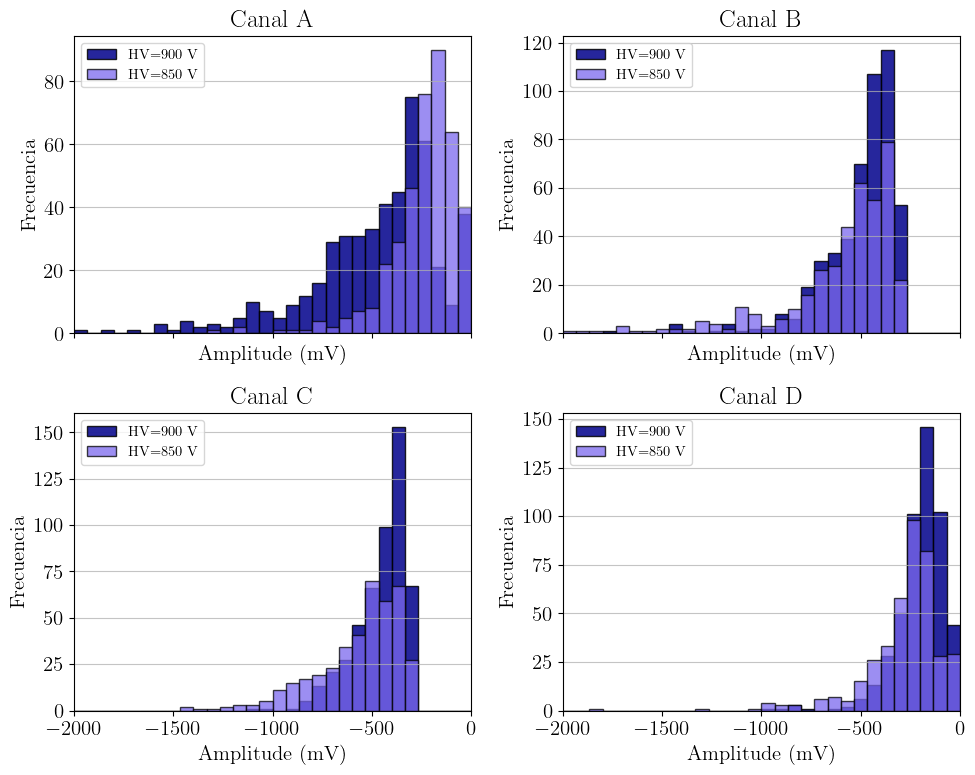

In [5]:
files_BC=['medidas/nico/BC_900v.txt','medidas/nico/BC_850v.txt']
files_BC.reverse()
labels=['HV=850 V','HV=900 V']
labels.reverse()
colors=['darkblue','mediumslateblue','deepskyblue','paleturquoise']
alphas=[0.85,0.75]
hist_amplitudes(files_BC,labels,colors,alphas)

### Tasas para distintos umbrais.

A continuación imos obter as tasas da radiación medida para distintos umbrais de dous métodos distintos:
1. Empregamos os datos tomados no laboratorio por Nicolás e Alberto 
2. Empregamos a función *novoUmbral(m,t,A,B,C,D)* do paquete *moduloscosmicos*

In [6]:
u1=-200;u2=-500;u3=-1000

#lemos os archivos de nico para cada umbral 
m_n1,t_n1=read(files6[-3])
m_n1_no,t1_no=novoUmbral(m_n1,t_n1, u1,0,0,0)
m_n2,t_n2=read(files6[-2])
m_n2_no,t2_no=novoUmbral(m_n2,t_n2, u2,0,0,0)
m_n3,t_n3=read(files6[-1])
m_n3_no,t3_no=novoUmbral(m_n3,t_n3, u3,0,0,0)

#lemos o noso archivo de 1000 contas con trigger en A,B,C e D de -120 mV (a 1000V).
m,t=read(files1[1])
m=supresionCeros(m,t, -80)
m1,t1=novoUmbral(m,t,u1,0,0,0)
m2,t2=novoUmbral(m,t,u2,0,0,0)
m3,t3=novoUmbral(m,t,u3,0,0,0)

#Asociamoslle ao tempo unha incertidumbre de sqrt(2) e as contas de sqrt(contas) 
#e usamos propagación de incertidumbres para obter as tasas

tasa1,u_t1=tasa(len(m_n1),t_n1[-1],t_n1[0])
tasa2,u_t2=tasa(len(m_n2),t_n2[-1],t_n2[0])
tasa3,u_t3=tasa(len(m_n3),t_n3[-1],t_n3[0])

print('\n')
print('Datos medidos no lab.')
print('Para un umbral',u1,'a tasa é:',tasa1,'±',u_t1)
print('Para un umbral',u1,'a tasa é:',tasa2,'±',u_t2)
print('Para un umbral',u1,'a tasa é:',tasa3,'±',u_t3)

tasa1_,u_t1_=tasa(len(m1),t1[-1],t1[0])
tasa2_,u_t2_=tasa(len(m2),t2[-1],t2[0])
tasa3_,u_t3_=tasa(len(m3),t3[-1],t3[0])

print('\n')
print('Datos obtidos coa función.')
print('Para un umbral',u1,'a tasa é:',tasa1_,'±',u_t1_)
print('Para un umbral',u1,'a tasa é:',tasa2_,'±',u_t2_)
print('Para un umbral',u1,'a tasa é:',tasa3_,'±',u_t3_)


Os triggers eliminados co novo umbral foron 0 de 200 triggers, 0.0 %
Os triggers eliminados co novo umbral foron 0 de 200 triggers, 0.0 %
Os triggers eliminados co novo umbral foron 87 de 300 triggers, 28.999999999999996 %
Os triggers eliminados co novo umbral foron 180 de 1000 triggers, 18.0 %
Os triggers eliminados co novo umbral foron 783 de 1000 triggers, 78.3 %
Os triggers eliminados co novo umbral foron 983 de 1000 triggers, 98.3 %


Datos medidos no lab.
Para un umbral -200 a tasa é: 28.804664051203172 ± 2.0367973280406133
Para un umbral -200 a tasa é: 9.762197744053724 ± 0.6902916224104405
Para un umbral -200 a tasa é: 2.1548665837339924 ± 0.124411280218655


Datos obtidos coa función.
Para un umbral -200 a tasa é: 0.2946011949780372 ± 0.010287919987129085
Para un umbral -200 a tasa é: 0.07982153766924929 ± 0.005418639054007868
Para un umbral -200 a tasa é: 0.0075910975940593995 ± 0.0018411115996869998


## Dependencia da eficiencia intrínseca co umbral.

Calculamos a eficiencia intrínseca para distintas voltaxes e distintos umbrais para facer un mapa d calor a ver si sale !!

Os triggers eliminados co novo umbral foron 1 de 401 triggers, 0.24937655860349126 %
Os triggers eliminados co novo umbral foron 6 de 400 triggers, 1.5 %
Os triggers eliminados co novo umbral foron 0 de 400 triggers, 0.0 %
Os triggers eliminados co novo umbral foron 2 de 400 triggers, 0.5 %
Os triggers eliminados co novo umbral foron 1 de 400 triggers, 0.25 %
Os triggers eliminados co novo umbral foron 0 de 400 triggers, 0.0 %
Os triggers eliminados co novo umbral foron 0 de 400 triggers, 0.0 %
Os triggers eliminados co novo umbral foron 774 de 1000 triggers, 77.4 %


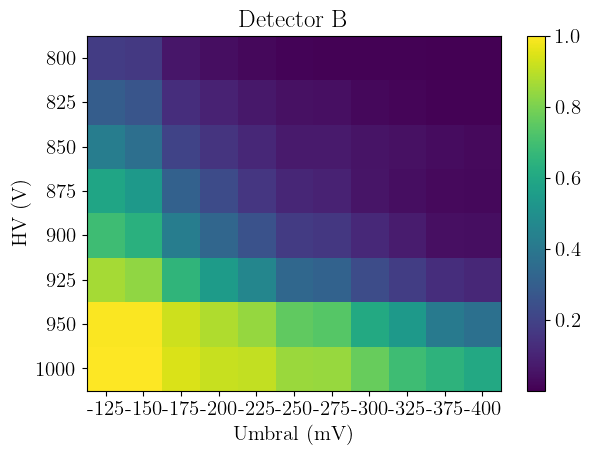

In [7]:
files2=['medidas/v/800V_contrapo.txt','medidas/v/825V.txt','medidas/v/850V.txt','medidas/v/875V.txt',
        'medidas/v/900V.txt','medidas/v/925V.txt','medidas/v/950V.txt','medidas/medidas1000V_1000.txt']

voltaxes=[800,825,850,875,900,925,950,1000]
umbrais=[-125,-150,-175,-200,-225,-250,-275,-300,-325,-375,-400]


det_B = np.ones((len(voltaxes), len(umbrais)))
det_C = np.ones((len(voltaxes),len(umbrais)))

for i in range(len(files2)):
    m, t = read(files2[i])
    m=supresionCeros(m,t, -80)
    m,t=novoUmbral(m,t, -200,-200,0,0)
    min_ampl,min_t=minimos_amplitude(m)
    for j in range(len(umbrais)):
        umbral=umbrais[j]
        ef_i_1=ef_intr(min_ampl,umbral)
        det_B[i][j]=ef_i_1[3].nominal_value
        det_C[i][j]=ef_i_1[2].s


df = pd.DataFrame(det_C)
df.to_excel('det.xlsx', index=False)
    
#plt.rcParams["figure.figsize"] = [8.0, 5.50]
plt.imshow(det_B, cmap='viridis', interpolation='nearest', aspect='auto')

# Configurar etiquetas de los ejes
plt.xticks(np.arange(len(umbrais)), umbrais)
plt.yticks(np.arange(len(voltaxes)), voltaxes)
plt.ylabel('HV (V)')
plt.xlabel('Umbral (mV)')
plt.title('Detector B')
# Añadir colorbar
plt.colorbar()

# Mostrar el mapa de calor
plt.savefig('det_B.png', dpi=300)
plt.show()

In [8]:
det_C

array([[0.02173167, 0.01997498, 0.01315532, 0.01232946, 0.00986233,
        0.00800391, 0.00758391, 0.005625  , 0.00502494, 0.00434633,
        0.00354436],
       [0.02926851, 0.02633422, 0.01905163, 0.01730309, 0.01590894,
        0.0136326 , 0.01308678, 0.00966384, 0.00853453, 0.0081273 ,
        0.0081273 ],
       [0.04038874, 0.03846447, 0.02659417, 0.02211087, 0.01936855,
        0.0168082 , 0.0163559 , 0.0139424 , 0.01260952, 0.01052452,
        0.00951643],
       [0.05501276, 0.0508317 , 0.03778281, 0.03140009, 0.02725591,
        0.02028236, 0.01987952, 0.01452395, 0.0121063 , 0.00991279,
        0.00991279],
       [0.06545193, 0.06410681, 0.05457046, 0.04501392, 0.0408004 ,
        0.03400035, 0.03321811, 0.02802792, 0.02402091, 0.01982668,
        0.01773529],
       [0.06858571, 0.06845265, 0.06498185, 0.06108191, 0.05782733,
        0.0492703 , 0.04758217, 0.04286771, 0.03711553, 0.02993326,
        0.02845199],
       [0.06964912, 0.06964912, 0.06885174, 0.06738706, 0.

## Eficiencia xeométrica.

Partimos dos datos obtidos realizando o montecarlo (co programa MC.py) para obter as eficiencias xeométricas. Empregamos o paquete *uncertainties* de python que fai automáticamente a propagación de incertezas. Como tratamos con número de contas a incerteza que asociamos en cada caso é sqrt(N).

In [9]:
N=1000000
N_u=ufloat(N, np.sqrt(N))

#MC simple para os triggers A e B. 
contas_A=[1000000, 919218, 843047, 765576]
contas_B=[919197, 1000000, 918982, 836788]

ef_xeo_D_A = ufloat(contas_A[3], np.sqrt(contas_A[3])) / N_u
ef_xeo_C_A = ufloat(contas_A[2], np.sqrt(contas_A[2])) / N_u
ef_xeo_B_A = ufloat(contas_A[1], np.sqrt(contas_A[1])) / N_u

ef_xeo_D_B = ufloat(contas_B[3], np.sqrt(contas_B[3])) / N_u
ef_xeo_C_B =ufloat(contas_B[2], np.sqrt(contas_B[2])) / N_u
ef_xeo_A_B =ufloat(contas_B[0], np.sqrt(contas_B[0])) / N_u

print('Eficiencia xeométrica para B:',ef_xeo_B_A)
print('Eficiencia xeométrica para C:',ef_xeo_C_A)
print('Eficiencia xeométrica para D:',ef_xeo_D_A)

print('\n')
print('Eficiencia xeométrica para A:',ef_xeo_A_B)
print('Eficiencia xeométrica para C:',ef_xeo_C_B)
print('Eficiencia xeométrica para D:',ef_xeo_D_B)

Eficiencia xeométrica para B: 0.9192+/-0.0013
Eficiencia xeométrica para C: 0.8430+/-0.0012
Eficiencia xeométrica para D: 0.7656+/-0.0012


Eficiencia xeométrica para A: 0.9192+/-0.0013
Eficiencia xeométrica para C: 0.9190+/-0.0013
Eficiencia xeométrica para D: 0.8368+/-0.0012


In [10]:
#trigger AB 
contas_AB=[842797, 765348] #C e D
total_AB=919381

#trigger ABC
contas_ABC=[765805] #D
total_ABC=843044

#trigger BC
contas_BC=[842961, 837227]
total_BC=919280

#trigger BCD
contas_BCD=[765903]
total_BCD=837416

#trigger ABCnD
contas_ABCnD=[693677,692224]
total_ABCnD=842836
total=1000000

ef_xeo = ufloat(contas_ABCnD[1], np.sqrt(contas_ABCnD[1])) /ufloat(total, np.sqrt(total))

In [11]:
ef_xeo

0.692224+/-0.001082311446015425

## Eficiencia intrínseca.

Usamos a función *ef_intr* que che calcula a eficiencia intrínseca a partir do vector de mínimos da amplitude e para o umbral que queiras. Igual que no caso anterior usamos o paquete de python e asocimaos unha incerteza de sqrt(N).

In [12]:
#Archivo con trigger en A e D: calculamos as eficiencias de B e C. Non fai falta correxir por ef xeométrica.
print(files4[0])
m, t = read(files4[0])
m=supresionCeros(m,t, -80)
m,t=novoUmbral(m,t, -150,-150,0,0)
min_ampl,min_t=minimos_amplitude(m)

umbral=-120

ef_i_1=ef_intr(min_ampl,umbral)
ef_i_B=ef_i_1[3]
ef_i_C=ef_i_1[2]

print('\n')
print('Umbral:',umbral)
print('\n')
print('Eficiencia intrínseca para B: {:.5f}'.format(ef_i_B))
print('Eficiencia intrínseca para C: {:.5f}'.format(ef_i_C))

medidas/intr/triggerAD_600.txt
Os triggers eliminados co novo umbral foron 0 de 600 triggers, 0.0 %


Umbral: -120


Eficiencia intrínseca para B: 0.98833+/-0.05723
Eficiencia intrínseca para C: 0.99167+/-0.05737


In [13]:
#archivo con trigger en B e C: calculamos as eficiencias A e D. correxir pola ef xeométrica.

m2, t2 = read(files4[2])
m2=supresionCeros(m2,t2, -80)
m2_,t2_=novoUmbral(m2,t2, -120,-120,0,0)
min_ampl_2,min_t_2=minimos_amplitude(m2_)

umbral=-250

ef_i_2=ef_intr(min_ampl_2,umbral)
ef_i_A=ef_i_2[2]
ef_i_D=ef_i_2[3]

print('\n')
print('Umbral:',umbral)
print('\n')
print('Eficiencia intrínseca para A: {:.5f}'.format(ef_i_A))
print('Eficiencia intrínseca para D: {:.5f}'.format(ef_i_D))

ef_xeo_A = ufloat(contas_BC[0], np.sqrt(contas_BC[0])) /ufloat(total_BC, np.sqrt(total_BC))
ef_xeo_D = ufloat(contas_BC[1], np.sqrt(contas_BC[1])) /ufloat(total_BC, np.sqrt(total_BC))

ef_i_A=ef_i_A/ef_xeo_A
ef_i_D=ef_i_D/ef_xeo_D

print('\n')
print('Eficiencia intrínseca correxida para A: {:.5f}'.format(ef_i_A))
print('Eficiencia intrínseca correxida para D: {:.5f}'.format(ef_i_D))

Os triggers eliminados co novo umbral foron 11 de 1200 triggers, 0.9166666666666666 %


Umbral: -250


Eficiencia intrínseca para A: 0.90580+/-0.03810
Eficiencia intrínseca para D: 0.52986+/-0.02611


Eficiencia intrínseca correxida para A: 0.98781+/-0.04158
Eficiencia intrínseca correxida para D: 0.58179+/-0.02868


In [14]:
#Archivo con trigger en B e D: calculamos as eficiencias de A e C. Non fai falta correxir por ef xeométrica.
print(files4[3])
m, t = read(files4[3])
m=supresionCeros(m,t, -80)
m,t=novoUmbral(m,t, -150,-150,0,0)
min_ampl,min_t=minimos_amplitude(m)

umbral=-150

ef_i_1=ef_intr(min_ampl,umbral)
ef_i_A=ef_i_1[3]
ef_i_C=ef_i_1[2]

print('\n')
print('Umbral:',umbral)
print('\n')
print('Eficiencia intrínseca para A: {:.5f}'.format(ef_i_A))
print('Eficiencia intrínseca para C: {:.5f}'.format(ef_i_C))

medidas/intr/triggerBD_1200_ABcambiados.txt
Os triggers eliminados co novo umbral foron 0 de 1200 triggers, 0.0 %


Umbral: -150


Eficiencia intrínseca para A: 0.99583+/-0.04070
Eficiencia intrínseca para C: 0.98833+/-0.04047


### Cálculo das eficiencias xeométricas a distintas distancias.

Neste apartado intentamos ver se os resultados obtidos co MC representan a situación real, mais como os datos que tomamos estaban mal tomados non obtemos nada con sentido.

In [15]:
#esto está fatal así que nada

m2,t2=read(files3[1])
m3,t3=read(files3[2])
m5,t5=read(files1[1])


tasa_d1,u1=tasa(len(m2),t2[-1],t2[0])
tasa_d2,u2=tasa(len(m3), t3[-1], t3[0])
tasa_3,u3=tasa(len(m5), t5[-1], t5[0])

t_d1=ufloat(tasa_d1,u1)
t_d2=ufloat(tasa_d2,u2)
t_0=ufloat(tasa_3,u3)

e_a1=ufloat(0.931,0.039)
e_b1=ufloat(0.992,0.057)
e_c1=ufloat(0.988,0.057)
e_d1=ufloat(0.858,0.037)
e_xeo1=ufloat(0.8053,0.0012) #esto esta mal
e_a2=ufloat(0.929,0.039)
e_b2=ufloat(0.988,0.057)

N=1000000
contas=[931847, 866570, 805275, 349867, 84482]

ef_xeo_1 = ufloat(contas[-2], np.sqrt(contas[2])) / ufloat(N, np.sqrt(N))
ef_xeo_2=ufloat(contas[-1], np.sqrt(contas[1])) / ufloat(N, np.sqrt(N))

## Valores do fluxo incidente de particulas.

Calculamos nun primeiro momento o fluxo que obtemos cos nosos datos. O umbral que temos é de -150, polo tanto as eficiencias intrínsecas teñen que ser para ese umbral.

In [16]:
m1,t1=read(files4[2]) #trigger BC
m1,t1=novoUmbral(m1,t1,-150,-150,0,0)

m2,t2=read(files1[1]) #trigger ABCD
m2,t2=novoUmbral(m2,t2,-150,-150,0,0)

ef_i_A=ufloat(0.996,0.040)
ef_i_B=ufloat(0.988,0.057)
ef_i_C=ufloat(0.988,0.057)
ef_i_D=ufloat(0.916,0.039)

print('\n')
fluxo1=fluxo_muons(m1,t1)
print('\n')
fluxo2=fluxo_muons(m2,t2)

ef_i_ABCD=ef_i_A*ef_i_B*ef_i_C*ef_i_D
ef_i_BC=ef_i_B*ef_i_C

print('\n')
print('Eficiencia intrinseca ABCD',ef_i_ABCD)
print('Eficiencia intrinseca BC',ef_i_BC)

ef_xeo_ABCD=ufloat(0.7656,0.0012)
ef_xeo_BC=ufloat(0.9190,0.0013)
print('\n')
print('Eficiencia xeometrica ABCD',ef_xeo_ABCD)
print('Eficiencia xeometrica BC',ef_xeo_BC)

ef_t_ABCD=ef_i_ABCD*ef_xeo_ABCD
ef_t_BC=ef_i_BC*ef_xeo_BC

print('\n')
print('Eficiencia total ABCD',ef_t_ABCD)
print('Eficiencia total BC',ef_t_BC)

print('\n')
print('fluxo correxido')
fluxo1_c=fluxo1/ef_t_BC
fluxo2_c=fluxo2/ef_t_ABCD
print('Fluxo corrixido BC',fluxo1_c)
print('Fluxo corrixido ABCD',fluxo2_c)

Os triggers eliminados co novo umbral foron 11 de 1200 triggers, 0.9166666666666666 %
Os triggers eliminados co novo umbral foron 0 de 1000 triggers, 0.0 %


O número de contas é 1189+/-34
A diferenza de tempos en s 294.49281700
A área é 906+/-6
A tasa é 0.267+/-0.008


O número de contas é 1000+/-32
A diferenza de tempos en s 2793.18714300
A área é 906+/-6
A tasa é 0.0237+/-0.0008


Eficiencia intrinseca ABCD 0.89+/-0.09
Eficiencia intrinseca BC 0.98+/-0.08


Eficiencia xeometrica ABCD 0.7656+/-0.0012
Eficiencia xeometrica BC 0.9190+/-0.0013


Eficiencia total ABCD 0.68+/-0.07
Eficiencia total BC 0.90+/-0.07


fluxo correxido
Fluxo corrixido BC 0.298+/-0.026
Fluxo corrixido ABCD 0.035+/-0.004


Agora facemos o mesmo cos datos de Alex que foron tomados cun umbral de -250 asi q espero q sala ben :(

In [17]:
m1,t1=read(files7[0]) #trigger en A
m1,t1=novoUmbral(m1,t1,-150,-150,0,0)

m2,t2=read(files7[1]) #trigger ABC
m2,t2=novoUmbral(m2,t2,-250,-250,0,0)

m3,t3=read(files7[2]) #trigger ABCD
m3,t3=novoUmbral(m3,t3,-250,-250,0,0)

m4,t4=read(files7[4]) #trigger ABC noite
m4,t4=novoUmbral(m4,t4,-250,-250,0,0)


ef_i_A=ufloat(0.978,0.040)
ef_i_B=ufloat(0.898,0.053)
ef_i_C=ufloat(0.852,0.051)
ef_i_D=ufloat(0.581,0.029)

print('\n')
fluxo1=fluxo_muons(m1,t1)
print('\n')
fluxo2=fluxo_muons(m2, t2)
print('\n')
fluxo3=fluxo_muons(m3, t3)
print('\n')
fluxo4=fluxo_muons(m4, t4)

ef_i_ABCD=ef_i_A*ef_i_B*ef_i_C*ef_i_D
ef_i_ABC=ef_i_B*ef_i_C*ef_i_A

print('\n')
print('Eficiencia intrinseca A',ef_i_A)
print('Eficiencia intrinseca ABCD',ef_i_ABCD)
print('Eficiencia intrinseca ABC',ef_i_ABC)

ef_xeo_ABCD=ufloat(0.7656,0.0012)
ef_xeo_ABC=ufloat(0.8430,0.0012)

print('\n')
print('Eficiencia xeometrica ABCD',ef_xeo_ABCD)
print('Eficiencia xeometrica ABC',ef_xeo_ABC)

ef_t_ABCD=ef_i_ABCD*ef_xeo_ABCD
ef_t_ABC=ef_i_ABC*ef_xeo_ABC

print('\n')
print('Eficiencia total ABCD',ef_t_ABCD)
print('Eficiencia total ABC',ef_t_ABC)

print('\n')
print('fluxo correxido')
fluxo1=fluxo1/ef_i_A
fluxo2=fluxo2/ef_t_ABC
fluxo3=fluxo3/ef_t_ABCD
fluxo4=fluxo4/ef_t_ABC
print('Fluxo corrixido A',fluxo1)
print('Fluxo corrixido ABC',fluxo2)
print('Fluxo corrixido ABCD',fluxo3)
print('Fluxo corrixido ABC',fluxo4)


Os triggers eliminados co novo umbral foron 2435 de 3000 triggers, 81.16666666666667 %
Os triggers eliminados co novo umbral foron 0 de 3000 triggers, 0.0 %
Os triggers eliminados co novo umbral foron 0 de 3000 triggers, 0.0 %
Os triggers eliminados co novo umbral foron 0 de 36204 triggers, 0.0 %


O número de contas é 565+/-24
A diferenza de tempos en s 123.33342100
A área é 906+/-6
A tasa é 0.303+/-0.013


O número de contas é (3.00+/-0.05)e+03
A diferenza de tempos en s 1560.03098900
A área é 906+/-6
A tasa é 0.1274+/-0.0025


O número de contas é (3.00+/-0.05)e+03
A diferenza de tempos en s 2438.31485200
A área é 906+/-6
A tasa é 0.0815+/-0.0016


O número de contas é (3.620+/-0.019)e+04
A diferenza de tempos en s 72069.18392000
A área é 906+/-6
A tasa é 0.03327+/-0.00028


Eficiencia intrinseca A 0.98+/-0.04
Eficiencia intrinseca ABCD 0.43+/-0.05
Eficiencia intrinseca ABC 0.75+/-0.07


Eficiencia xeometrica ABCD 0.7656+/-0.0012
Eficiencia xeometrica ABC 0.8430+/-0.0012


Eficienci

## Histograma a intervalos de tempo fixos.

Nesta sección realizamos o estudo estadistico que nos permite afirmar se a nosa distribución de datos e de poisson ou no. Obtemos a tabla do chi nun arquivo de excel. Para obter as demais tablas que non presentamos no informe só habería que camiar o delta ao valor desexado.

Os triggers eliminados co novo umbral foron 1 de 12209 triggers, 0.008190679007289703 %


Arquivo ABCD carol
Intervalo de tempo 75


Reagrupamos os bins para que o número de contas sexa significativo en todos os casos.
A media do histograma sen mellorar é 12.597523219814242


A media do histograma é 12.597523219814242


A media despois de reagrupar do histograma é 12.593395252837977


Valores para a distribución de Poisson
chi_squared = 20.141361287256917
Graos de liberdade: 23
chi_reducido= 0.8757113603155181
1-alpha =  0.6333697924503578
Valores para a distribución de Gauss
chi_squared = 47.5161914571477
Graos de liberdade: 23
chi_reducido= 2.065921367702074
1-alpha =  0.001928386740471355


A media do histograma é 12.597523219814242


A media despois de reagrupar do histograma é 12.597523219814242


Valores para a distribución de Poisson
chi_squared = 24.990036862616957
Graos de liberdade: 23
chi_reducido= 1.0865233418529112
1-alpha =  0.35079924819613095
Valores para a distribución

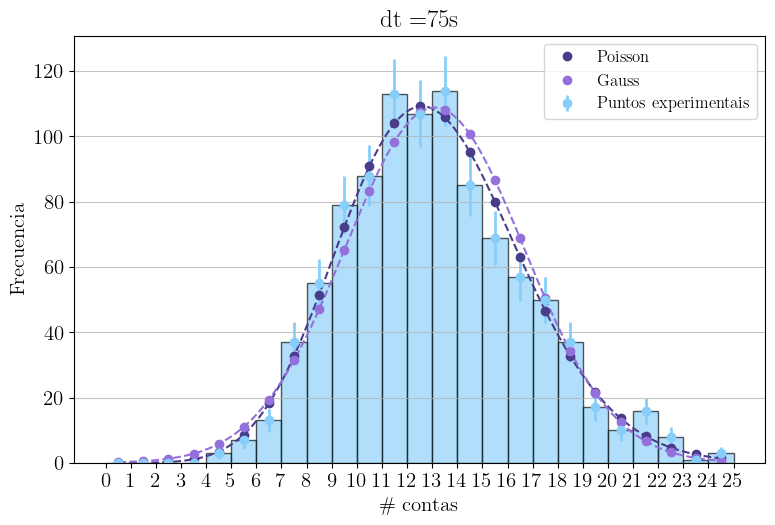

In [18]:
umbral=-120

m, t = read(files5[0])
m=supresionCeros(m,t, -80)
m,t=novoUmbral(m,t, umbral,umbral,umbral,None)
plt.rcParams["figure.figsize"] = [8.0, 5.50]

delta=75

Nrepeat=n_contas(t,delta)


print('\n')
print('Arquivo ABCD carol')
print('Intervalo de tempo', delta)
print('\n')

Nmax=int(max(Nrepeat))
n_bins=Nmax #teñen que valer a unidade

hist, bordes = np.histogram(Nrepeat, bins=n_bins,range=(0,Nmax))


print('Reagrupamos os bins para que o número de contas sexa significativo en todos os casos.')


contas=bordes[:-1]
media=media_(contas,hist)

print('A media do histograma sen mellorar é',media)
hist_novo,it,it2=mejorartest(hist)

nome='tabla_chi.xlsx'
nome2='tabla_chi_senreagr.xlsx'

g_l,chi_poiss,chi_gauss,p_value,p_value_gauss,chiv_p_no,chiv_g_no=tabla_chi(contas,hist,nome,it,it2)
g_l,chi_poiss,chi_gauss,p_value,p_value_gauss,chiv_p,chiv_g=tabla_chi(contas,hist,nome2,0,0)


x=contas+1/2
f = interp1d(x, chiv_p, kind='cubic')
f2= interp1d(x, chiv_g, kind='cubic')

x_new = np.linspace(x[0], x[-1], 100)
y_new = f(x_new)
y_new_2=f2(x_new)

errors = np.sqrt(hist)

plt.figure()
plt.clf()
plt.hist(Nrepeat,bins=n_bins,range=(0,Nmax), alpha=0.65, rwidth=1,color='lightskyblue',edgecolor='black')
plt.errorbar(x, hist, yerr=errors, fmt='o', color='lightskyblue', linewidth=2,label='Puntos experimentais')
plt.plot(x_new,y_new,'--',color='darkslateblue')
plt.plot(x_new,y_new_2,'--',color='mediumpurple')
plt.plot(x,chiv_p,'o',label='Poisson',color='darkslateblue')
plt.plot(x,chiv_g,'o',label='Gauss',color='mediumpurple')

plt.title('dt ='+str(delta)+'s')
plt.grid(axis='y',alpha=0.75)
plt.xlabel('\# contas')
plt.xticks(bordes)
plt.ylabel('Frecuencia')
plt.legend(fontsize=12,loc='upper right')
plt.savefig('noite_45s.png', dpi=300)
plt.show()

## Histograma diferencias de tempo entre disparos.

Estudamos a distribucion exponencial para as medidas das diferencias entre disparos.

Os triggers eliminados co novo umbral foron 1 de 12209 triggers, 0.008190679007289703 %
medidas/noites/noite1.txt
A media do histograma é 5.5890575043630015


Valores para a distribución exponencial
chi_squared = 65.06550346446912
Graos de liberdade: 23
chi_reducido= 2.8289349332377878
1-alpha =  6.8550932693645095e-06


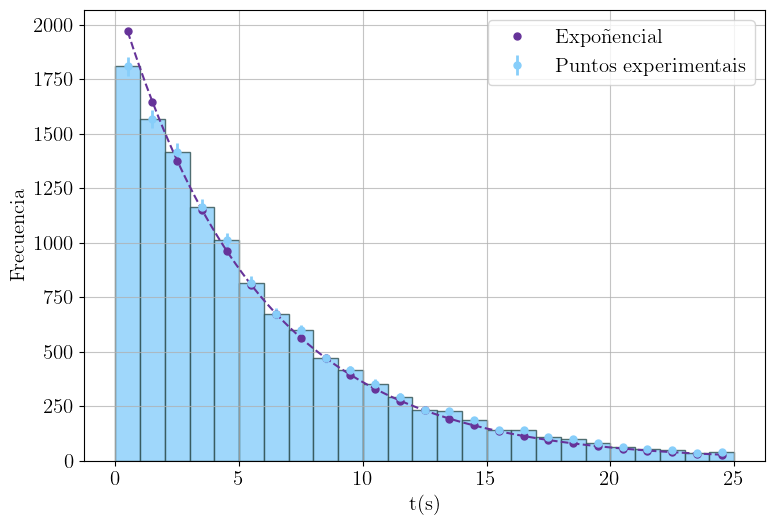

In [19]:
m, t = read(files5[0])
m=supresionCeros(m,t, -80)
m,t=novoUmbral(m,t, -120,-120,-120,None)
print(files5[0])

dt=np.diff(t)/1e6
media=np.mean(dt)

n_bins = math.ceil(math.log2(len(dt))) + 1
n_bins=25
lim=25
dt2=[]
for i in range(len(dt)):
    if dt[i]<lim:
        dt2.append(dt[i])
        
media2=np.mean(dt2)   
bin_range = (0, lim)
#n_bins=30

#--------Axuste a unha exponencial
hist, bordes = np.histogram(dt2, bins=n_bins,range=bin_range)

hist_novo=hist/sum(hist)

ancho_bins = bordes[1] - bordes[0]
x = bordes[:-1] + ancho_bins/2

# Graficar el histograma y la función exponencial ajustada
x2=np.linspace(x[0],x[-1],100)


nome='tabla_chi_exp.xlsx'
g_l,chi_exp,p_value,xiOi_tot,Eiv_exp=tabla_chi_exp(x,hist,media2,nome)

errors = np.sqrt(hist)
f = interp1d(x, Eiv_exp, kind='cubic')
x_new = np.linspace(x[0], x[-1], 100)
y_new = f(x_new)

plt.grid(alpha=0.75)
plt.hist(dt, bins=n_bins, range=bin_range,alpha=0.8, color='lightskyblue', edgecolor='darkslategrey')
plt.errorbar(x, hist, yerr=errors, fmt='o',markersize=5, color='lightskyblue', linewidth=2,label='Puntos experimentais')
plt.plot(x,Eiv_exp,'o',markersize=5,color='rebeccapurple',label='Expoñencial')
plt.plot(x_new,y_new,'--',color='rebeccapurple')
plt.legend(loc='upper right')
plt.xlabel('t(s)')
plt.ylabel('Frecuencia')
plt.savefig('expoñencial.png', dpi=300)
plt.show()

## Determinación da vida media do muon.

Imos estudar aqui cal é o tempo de vida media de desintegración dun muon estudando os segundos picos que medimos durante as tres noites.


Coa parte que está comentada obtemos os vectores ele_t_tot, ele_t_tot_3 e ele_t_tot_4, mais como tarda moito tempo copiamos os datos para axilizar o proceso.

chi_squared = 8.466527691495292
Graos de liberdade: 5
chi_squared reducido= 1.6933055382990585
Percentil do text X2 =  0.13232977767646992


n_bins 7


tau= 2589.4563459756505
s_tau= 141.89968941856839


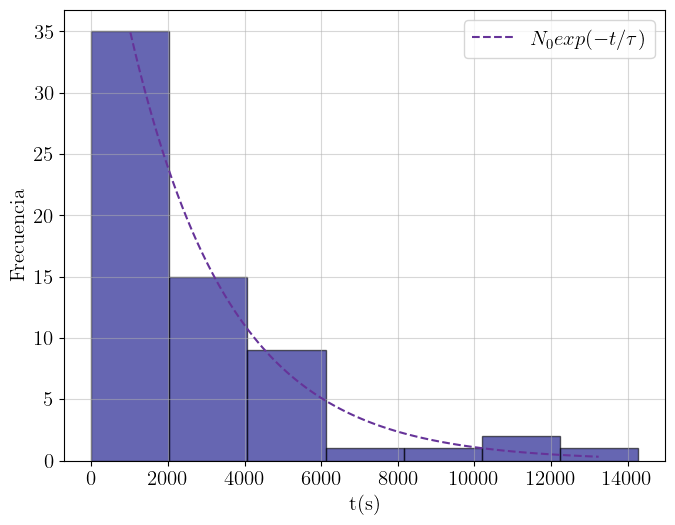

In [20]:

#umbral=150
#m, t = read(files5[0])
#m2, t2 = read(files5[1])
#m3, t3 = read(files5[2])
#m=supresionCeros(m,t, -80)
#m2=supresionCeros(m2,t2, -80)
#m3=supresionCeros(m3,t3, -80) 
#m,t=novoUmbral(m,t, -umbral,-umbral,-umbral,None)
#m2,t2=novoUmbral(m2,t2, -umbral,-umbral,-umbral,None)
#m3,t3=novoUmbral(m3,t3, -umbral,-umbral,-umbral,None)


#channel=4
#min_t=100
#print('\n')
#print('canal',channel)
#print('umbral',umbral)
#print('\n')
#ele_t,secPeaks=searchSecondMinimum(m,channel,min_t,-umbral)
#print('O número de segundos picos no arquivo 1 é',secPeaks)
#ele_t_2,secPeaks2=searchSecondMinimum(m2,channel,min_t,-umbral)
#print('O número de segundos picos no arquivo 2 é',secPeaks2)
#ele_t_3,secPeaks3=searchSecondMinimum(m3,channel,min_t,-umbral)
#print('O número de segundos picos no arquivo 3 é',secPeaks3)


#ele_t_tot=[]
#ele_t_tot_3=[]
#ele_t_tot_4=[]

#channels=[2,3,4]

#for i in range(len(channels)):
#    print('channel',channels[i])
#    print('\n')
#    ele_t,secPeaks=searchSecondMinimum(m,channels[i],min_t,-umbral)
#    print('O número de segundos picos no arquivo 1 é',secPeaks)
#    for j in range(len(ele_t)):
#        ele_t_tot.append(ele_t[j])
#        if i==1: #se o canal é o 3
#            ele_t_tot_3.append(ele_t[j])
#        if i==2: #se o canal é o 4
#            ele_t_tot_4.append(ele_t[j])
#    ele_t_2,secPeaks2=searchSecondMinimum(m2,channels[i],min_t,-umbral)
#    for k in range(len(ele_t_2)):
#        ele_t_tot.append(ele_t_2[k])
#        if i==1:
#            ele_t_tot_3.append(ele_t_2[k])
#        if i==2:
#            ele_t_tot_4.append(ele_t_2[k])
#    print('O número de segundos picos no arquivo 2 é',secPeaks2)
#    ele_t_3,secPeaks3=searchSecondMinimum(m3,channels[i],min_t,-umbral)
#    for l in range(len(ele_t_3)):
#        ele_t_tot.append(ele_t_3[l])
#        if i==1:
#            ele_t_tot_3.append(ele_t_3[l])
#        if i==2:
#            ele_t_tot_4.append(ele_t_3[l])
#    print('O número de segundos picos no arquivo 3 é',secPeaks3)

plt.rcParams["figure.figsize"] = [7.0, 5.50]

#segundos totais medidos
ele_t_tot=[6024, 6028, 7088, 1956, 1452, 1332, 1336, 1720, 2904, 4952, 4956, 356, 360, 
            3152, 1680, 308, 1192, 696, 532, 4044, 4048, 120, 10120, 3128, 3132, 6020, 
            2932, 2936, 4492, 2184, 436, 4952, 932, 936, 264, 1548, 1552, 116, 120, 1480, 
            14260, 300, 304, 268, 11088, 11092, 4768, 3488, 3492, 1852, 220, 104, 956, 3808, 
            3812, 2216, 2220, 5308, 736, 1484, 504, 216, 116,120] #len=64

#segundos picos no detector C
ele_t_tot_3=[10120, 3128, 3132, 6020, 2932, 2936, 4492, 2184, 436, 4952, 932, 936, 264, 1548, 
              1552, 116, 120, 1480, 14260, 300, 304, 268, 11088, 11092, 4768]

#segundos picos en D
ele_t_tot_4=[3488, 3492, 1852, 220, 104, 956, 3808, 3812, 2216, 2220, 5308, 736, 1484, 504, 216, 116, 120]

#n_bins = math.ceil(math.log2(len(ele_t_tot))) + 1
n_bins=7
lim=max(ele_t_tot)
bin_range=(0,lim)


hist, bordes = np.histogram(ele_t_tot, bins=n_bins,range=bin_range)

ancho_bins = bordes[1] - bordes[0]
x = bordes[:-1] + ancho_bins/2
sigma = 1 / np.sqrt(hist)

popt, pcov = curve_fit(exponencial_tau, x, hist, sigma=sigma,bounds=([0,1000],[250,4000]))
axuste = exponencial_tau(x, *popt)

chi2,g_l,chi2_r=chi_axuste(hist,axuste,2)

perr = np.sqrt(np.diag(pcov))
s_N, s_tau = perr

print('\n')
print('n_bins',n_bins)
print('\n')
print('tau=',popt[1])
print('s_tau=',s_tau)




# Graficar el histograma y la función exponencial ajustada
x2=np.linspace(x[0],x[-1],100)
plt.grid(alpha=0.5)
plt.hist(ele_t_tot, bins=n_bins,range=bin_range,alpha=0.6, rwidth=1,edgecolor='black',color='navy')
plt.plot(x2, exponencial_tau(x2, *popt), '--',color='rebeccapurple', label=r'$N_0 exp(-t/ \tau)$')
plt.xlabel('t(s)')
plt.ylabel('Frecuencia')
plt.legend()
plt.savefig('vidamedia_muon.png', dpi=300)
plt.show()

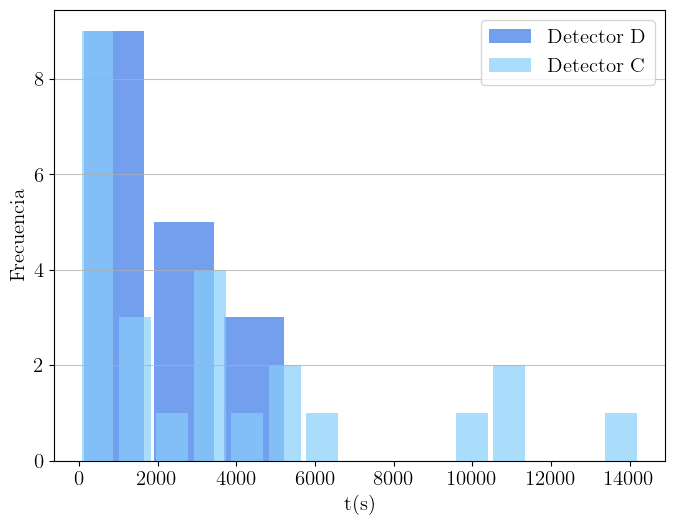

In [21]:
n_bins_1=15
n_bins_2=8
bin_range=(0,14260)


plt.hist(ele_t_tot_4, bins=n_bins_2,range=(0,14260),alpha=0.9, rwidth=0.85,color='cornflowerblue',label='Detector D')
plt.hist(ele_t_tot_3, bins=n_bins_1,range=bin_range,alpha=0.7, rwidth=0.85,color='lightskyblue',label='Detector C')
plt.grid(axis='y',alpha=0.75)
plt.xlabel('t(s)')
plt.ylabel('Frecuencia')
plt.legend()
plt.savefig('comparativa_BeD.png', dpi=300)
plt.show()